In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
data_dynamic1 = pd.read_csv(r"06.2.w_e_030321_fcdDynamicData.csv")
data_dynamic2 = pd.read_csv(r"06.2.w_e_040321_fcdDynamicData.csv")
data_dynamic3 = pd.read_csv(r"06.2.w_e_050321_fcdDynamicData.csv")
data_dynamic4 = pd.read_csv(r"06.2.w_e_150321_fcdDynamicData.csv")

data_static = pd.read_csv(r"06.2.w_e_fcdStaticData.csv")

In [2]:
df1 = data_dynamic1.merge(data_static, on='segmentId', how='left') 
df2 = data_dynamic2.merge(data_static, on='segmentId', how='left') 
df3 = data_dynamic3.merge(data_static, on='segmentId', how='left') 
df4_testdata = data_dynamic4.merge(data_static, on='segmentId', how='left') 
df4_testdata

,discoveryTime,segmentId,travelTime,coverage,lengthmm,speedLimitKph
0,2021-03-15 00:00:00,131016,1576,10,30651,70
1,2021-03-15 00:00:00,134879,1311,10,25508,70
2,2021-03-15 00:00:00,135146,1539,10,29935,70
3,2021-03-15 00:00:00,182928,1769,10,34413,70
4,2021-03-15 00:00:00,182929,1769,10,34413,70
...,...,...,...,...,...,...
82578,2021-03-15 23:56:00,7425668,3062,10,42529,50
82579,2021-03-15 23:56:00,7425669,3062,10,42529,50
82580,2021-03-15 23:56:00,7452950,3480,10,48346,50
82581,2021-03-15 23:56:00,7452951,2036,10,28279,50


In [3]:

d1 = pd.concat((df1,df2),axis = 0)

df1 = pd.concat((d1,df3),axis = 0)

df1.reset_index(inplace=True)

df1.drop("coverage", axis = 1,inplace = True)
df1.drop("index", axis = 1, inplace = True)

df1

,discoveryTime,segmentId,travelTime,lengthmm,speedLimitKph
0,2021-03-03 00:00:00,131016,1576,30651,70
1,2021-03-03 00:00:00,134879,1311,25508,70
2,2021-03-03 00:00:00,135146,1539,29935,70
3,2021-03-03 00:00:00,182928,1769,34413,70
4,2021-03-03 00:00:00,182929,1769,34413,70
...,...,...,...,...,...
263391,2021-03-05 23:55:00,7425668,3062,42529,50
263392,2021-03-05 23:55:00,7425669,3062,42529,50
263393,2021-03-05 23:55:00,7452950,3480,48346,50
263394,2021-03-05 23:55:00,7452951,2036,28279,50


In [5]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()

"""
df1['discoveryTime'] = df1['discoveryTime'].str[11:]
df4_testdata['discoveryTime'] = df4_testdata['discoveryTime'].str[11:]"""

df4_testdata.sort_values(by = "segmentId", ascending=True)

df4_testdata["segmentId"] = le1.fit_transform(df4_testdata["segmentId"])



In [6]:
df4_testdata["travelTime"] = df4_testdata["travelTime"]*2.77777778 * (1/10000000)

df4_testdata["lengthmm"] = df4_testdata["lengthmm"]*(1/1000000)


df2_testdata= pd.DataFrame(df4_testdata)

df2_testdata['speed'] = df2_testdata["lengthmm"] / df2_testdata["travelTime"]

df1["travelTime"] = df1["travelTime"]*2.77777778 * (1/10000000)

df1["lengthmm"] = df1["lengthmm"]*(1/1000000)

df2= pd.DataFrame(df1)

df2['speed'] = df1["lengthmm"] / df1["travelTime"]

df2.head()

,discoveryTime,segmentId,travelTime,lengthmm,speedLimitKph,speed
0,2021-03-03 00:00:00,131016,0.000438,0.030651,70,70.014975
1,2021-03-03 00:00:00,134879,0.000364,0.025508,70,70.044851
2,2021-03-03 00:00:00,135146,0.000428,0.029935,70,70.023392
3,2021-03-03 00:00:00,182928,0.000491,0.034413,70,70.032108
4,2021-03-03 00:00:00,182929,0.000491,0.034413,70,70.032108


In [7]:

df2.sort_values(by = "segmentId", ascending=True)

df2["segmentId"] = le1.fit_transform(df2["segmentId"])

In [8]:
df2.head()

,discoveryTime,segmentId,travelTime,lengthmm,speedLimitKph,speed
0,2021-03-03 00:00:00,0,0.000438,0.030651,70,70.014975
1,2021-03-03 00:00:00,1,0.000364,0.025508,70,70.044851
2,2021-03-03 00:00:00,2,0.000428,0.029935,70,70.023392
3,2021-03-03 00:00:00,3,0.000491,0.034413,70,70.032108
4,2021-03-03 00:00:00,4,0.000491,0.034413,70,70.032108


<AxesSubplot:xlabel='segmentId'>

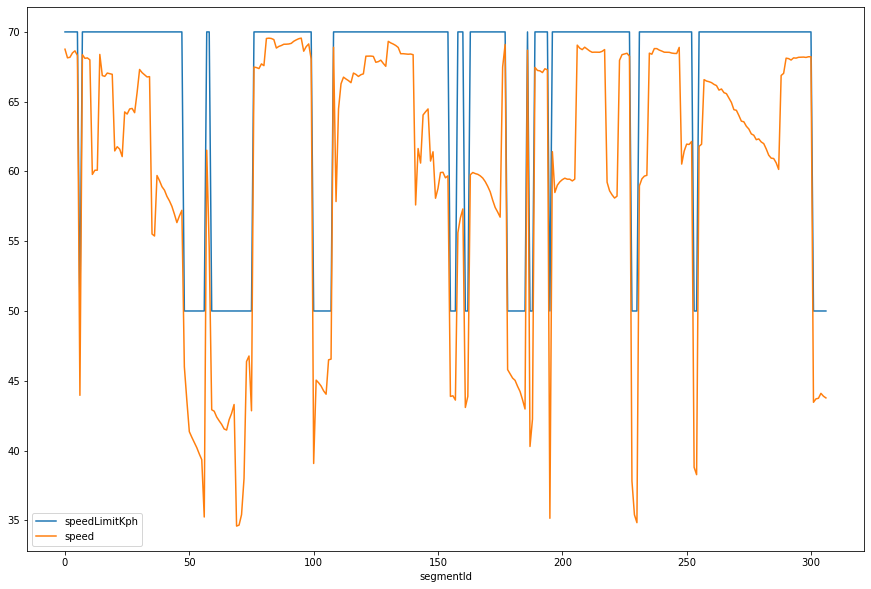

In [9]:
x_data1 = df2[["segmentId","speedLimitKph","speed"]]

x1_data = x_data1.groupby(by="segmentId").mean()               #????

x1_data.plot(figsize=(15,10))

In [10]:
df_segment = x1_data["speed"]<45

df1 = df_segment.reset_index()

df1.drop(df1[df1['speed'] == False].index, inplace=True)

df1["segmentId"].unique()

array([  6,  49,  50,  51,  52,  53,  54,  55,  56,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  75, 100, 102,
       103, 104, 105, 155, 156, 157, 161, 162, 182, 183, 184, 185, 187,
       188, 195, 228, 229, 230, 253, 254, 301, 302, 303, 304, 305, 306],
      dtype=int64)

In [11]:
def segmentId(k):
    df_segment = df2["segmentId"] == k

    dff = df_segment.reset_index()

    dff = dff.drop("index", axis=1)

    dff["ss"] = dff["segmentId"]

    dff1 = pd.concat((df2,dff),axis = 1)


    dff1.drop(dff1[dff1['ss'] == False].index, inplace=True)


    return dff1

In [12]:
dff1 = segmentId(54)

<AxesSubplot:xlabel='discoveryTime'>

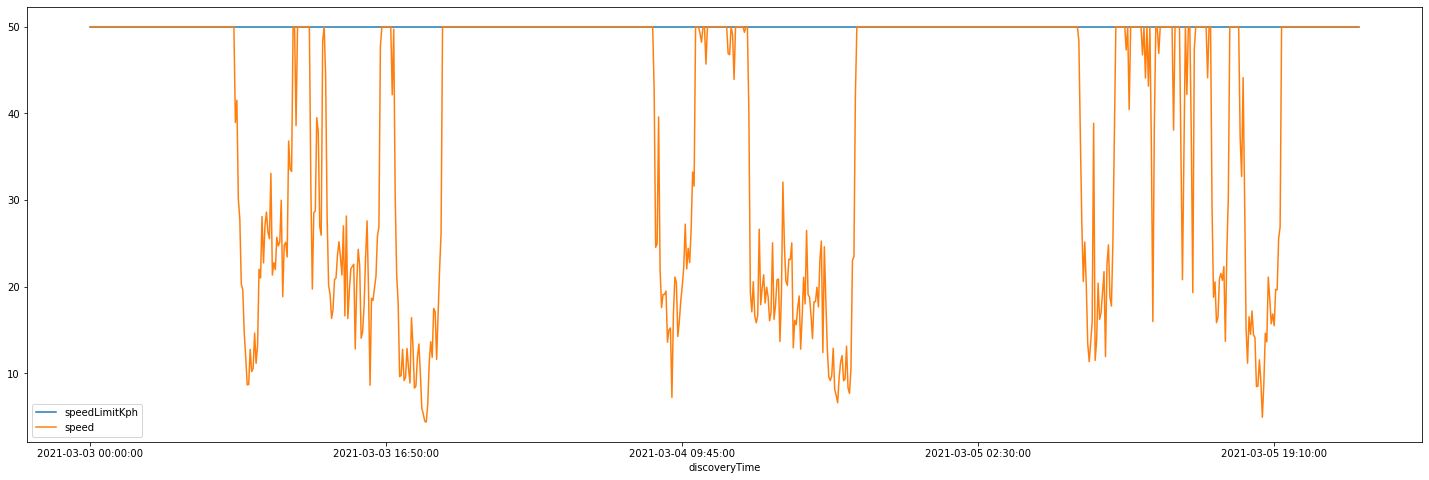

In [13]:
x_data = dff1[["discoveryTime","speedLimitKph","speed"]]

x_data.set_index("discoveryTime")

#x_data.groupby(by="discoveryTime").mean().plot(figsize=(15,5) )
x_data.set_index("discoveryTime").plot(figsize=(25,8))



In [15]:
x_data.reset_index(inplace =True)

In [16]:
x_data = x_data.drop(["index","speedLimitKph"], axis = 1)

In [17]:
x_data.set_index("discoveryTime",inplace=True)

x_data.index=pd.to_datetime(x_data.index)

In [18]:
from statsmodels.tsa.stattools import adfuller


result=adfuller(x_data['speed'])


dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -4.950820424740533,
 'pvalue': 2.774340292987075e-05,
 'usedlag': 6,
 'nobs': 851,
 'criticalvalues': {'1%': -3.438057561354894,
  '5%': -2.864942268638857,
  '10%': -2.5685816343390853},
 'icbest': 5012.395545564368}

In [19]:
x_data['1difference']=x_data['speed']-x_data['speed'].shift(1)

<AxesSubplot:xlabel='discoveryTime'>

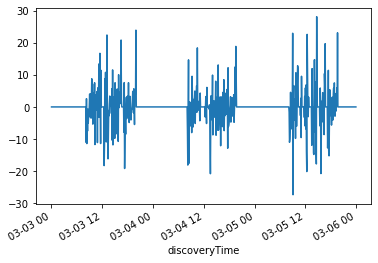

In [20]:
x_data['1difference'].plot()

In [21]:
result=adfuller(x_data['1difference'].dropna())
result

(-9.625659795404031,
 1.663365222547503e-16,
 11,
 845,
 {'1%': -3.4381124572018487,
  '5%': -2.864966469499829,
  '10%': -2.5685945257518994},
 5024.501883286362)

<AxesSubplot:xlabel='discoveryTime'>

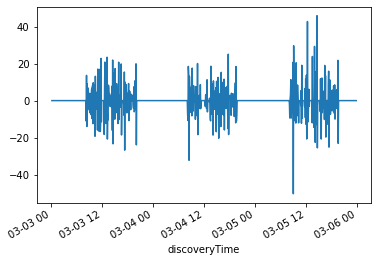

In [22]:
x_data['2difference']=x_data['1difference']-x_data['1difference'].shift(1)
x_data['2difference'].plot()

In [23]:
result=adfuller(x_data['2difference'].dropna())
result

(-11.409879478004346,
 7.294516651005254e-21,
 21,
 834,
 {'1%': -3.43821515743291,
  '5%': -2.8650117437698652,
  '10%': -2.568618642812369},
 5069.58502914857)

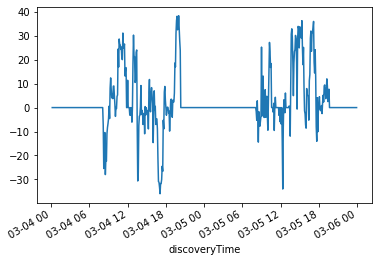

In [24]:
x_data['Seasonal_Difference']=x_data['speed']-x_data['speed'].shift(288)


ax=x_data['Seasonal_Difference'].plot()

In [25]:
result=adfuller((x_data['Seasonal_Difference']).dropna())
dict(zip(['adf', 'pvalue', 'usedlag', 'nobs', 'critical' 'values', 'icbest'],result))

{'adf': -5.2033107728577335,
 'pvalue': 8.656274330141072e-06,
 'usedlag': 9,
 'nobs': 560,
 'criticalvalues': {'1%': -3.442081300525009,
  '5%': -2.8667149792729596,
  '10%': -2.569526100127551},
 'icbest': 3553.3031618207633}

In [26]:
x_data['Seasonal_Difference1']=x_data['Seasonal_Difference']-x_data['Seasonal_Difference'].shift(288)

In [27]:
result=adfuller(x_data['Seasonal_Difference1'].dropna())
result

(-4.280581341612631,
 0.0004798936244667113,
 3,
 278,
 {'1%': -3.4540935579190495,
  '5%': -2.8719934111688965,
  '10%': -2.5723401594120388},
 1990.6378051832935)

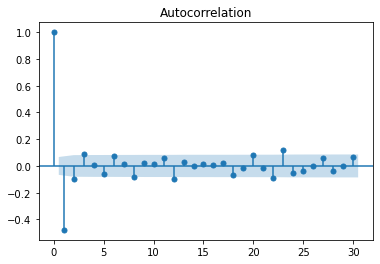

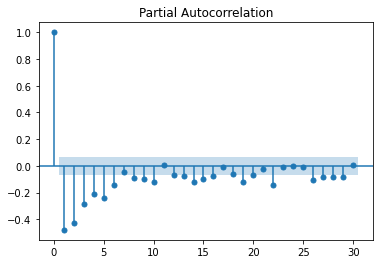

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig1=plot_acf(x_data['2difference'].dropna())

fig2=plot_pacf(x_data['2difference'].dropna())

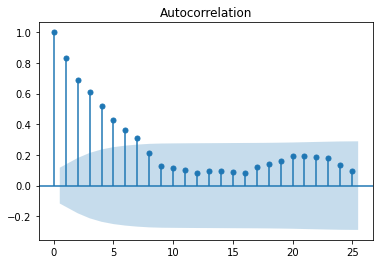

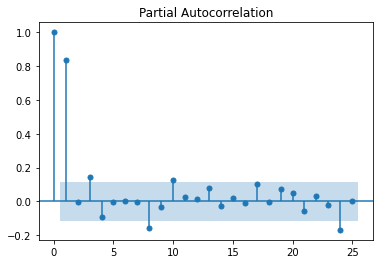

In [29]:
fig1=plot_acf(x_data['Seasonal_Difference1'].dropna())

fig2=plot_pacf(x_data['Seasonal_Difference1'].dropna())

In [30]:

#x_data.index = x_data.index.to_timestamp(freq ='5min')
x_data.index = pd.DatetimeIndex(x_data.index).to_period('5min')

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(x_data['speed'],order=(0,2,0),seasonal_order=(0, 1, 0, 288))
result=model.fit()

In [32]:
x_data.index = x_data.index.to_timestamp(freq ='5min')

In [33]:
from pandas.tseries.offsets import DateOffset


new_dates=[x_data.index[-1]+ DateOffset(minutes=5*x) for x in range(1,2881)] #2593

df_pred=pd.DataFrame(index=new_dates, columns =x_data.columns)


df_pred1 = pd.concat([x_data,df_pred],axis = 0)

In [34]:
df_pred1.index = pd.DatetimeIndex(df_pred1.index).to_period('5min')

#df_pred.index = df_pred.index.to_timestamp(freq ='5min')

<AxesSubplot:>

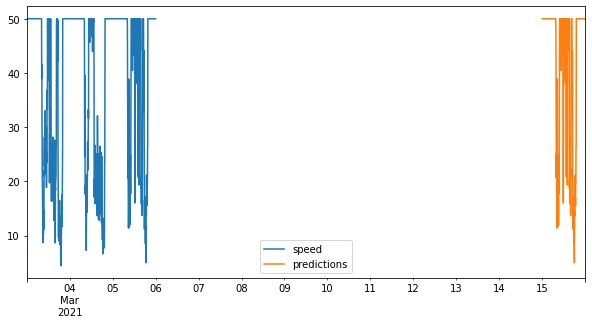

In [35]:
df_pred1['predictions'] = result.predict(start='2021-03-15 00:00:00', end='2021-03-15 23:55:00')
df_pred1[["speed","predictions"]].plot(figsize=(10,5))

<AxesSubplot:>

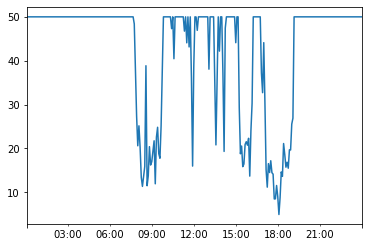

In [36]:
df_pred1[3450:]["predictions"].plot()

<AxesSubplot:xlabel='discoveryTime'>

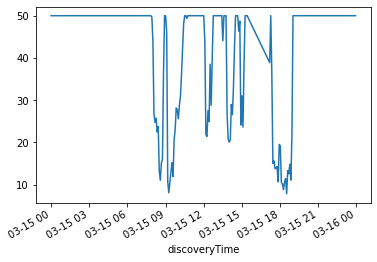

In [37]:
test_data = df4_testdata[df4_testdata.segmentId == 54]

test_data.set_index("discoveryTime",inplace=True)
test_data.index=pd.to_datetime(test_data.index)
test_data["speed"].plot()

In [38]:
df_predFiltered = df_pred1.iloc[3450:,:]
df_pred.head()

,level_0,speed,1difference,2difference,Seasonal_Difference,Seasonal_Difference1
2021-03-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-06 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-06 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-06 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-06 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_pred1[3450:]["predictions"].head()

2021-03-15 00:00    50.004199
2021-03-15 00:05    50.004199
2021-03-15 00:10    50.004199
2021-03-15 00:15    50.004199
2021-03-15 00:20    50.004199
Freq: 5T, Name: predictions, dtype: float64

In [40]:
test_data = df4_testdata[df4_testdata.segmentId == 49]

test_data.reset_index(inplace = True)
test_data.head()

,index,discoveryTime,segmentId,travelTime,coverage,lengthmm,speedLimitKph,speed
0,49,2021-03-15 00:00:00,49,0.000538,10,0.026905,50,50.00413
1,356,2021-03-15 00:05:00,49,0.000538,10,0.026905,50,50.00413
2,663,2021-03-15 00:10:00,49,0.000538,10,0.026905,50,50.00413
3,970,2021-03-15 00:15:00,49,0.000538,10,0.026905,50,50.00413
4,1277,2021-03-15 00:20:00,49,0.000538,10,0.026905,50,50.00413


In [41]:
yy_pred = df_pred1[3450:3637]["predictions"].values.reshape(len(df_pred1[3450:3637]["predictions"]),1)

yy_test = test_data[:187]["speed"].values.reshape(len(test_data[:187]["speed"]),1)

In [44]:
yy_pred[:5]

array([[50.00419944],
       [50.00419944],
       [50.00419944],
       [50.00419944],
       [50.00419944]])

In [45]:
yy_test[:5]

array([[50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006],
       [50.00413006]])

In [46]:
def mSE(y_pred, y_test):
    
    return np.sum((y_pred- y_test)**2) / len(y_pred)

print("Mean Squared Error değeri: "+ str(round(mSE(yy_pred,yy_test),5)))


Mean Squared Error değeri: 98.18341


In [48]:
from sklearn.metrics import mean_squared_error

mean_squared_error(yy_pred,yy_test)


98.18341086710674